In [159]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import log

In [100]:
def binarizacion(img, imprimir):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    lienzo = np.zeros((alto, ancho, 1))
    
    umbral = 120

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]
        
            if pixel > umbral:
                newPixel = 0
            else:
                newPixel = 255
            
            lienzo[i,j] = newPixel
            
    cv2.imwrite("binaria.jpg", lienzo)     
    
    img_out = cv2.imread("binaria.jpg")
    
    if imprimir == "Si":
        plt.imshow(img_out)
        plt.show()
    
    return img_out

In [140]:
def xor(x, y):
    return ((x and not y) or (not x and y))

In [182]:
def transformacion(img, operacion, imprimir, Alfa, Beta):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    lienzo = np.zeros((alto, ancho, 1))
    
    img_gris = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img_gris[i, j]
        
            if operacion == "negativa":
                newPixel = 255 - 1 - pixel
                
            elif operacion == "lineal":
                newPixel = Alfa*pixel+Beta
                
            elif operacion == "logaritmica":
                newPixel = Alfa*log(1+pixel)
                
            elif operacion == "exponencial":
                newPixel = int(Alfa*(pixel/255)**Beta)
            
            lienzo[i,j] = newPixel
            
    cv2.imwrite("transformacion.jpg", lienzo)     
    
    img_out = cv2.imread("transformacion.jpg")
    
    if imprimir == "Si":
        plt.imshow(img_out)
        plt.show()
    
    return img_out

In [216]:
def operar(img1, img2, operacion):
    alto = img1.shape[0]
    ancho = img1.shape[1]
    
    lienzo = np.zeros((alto, ancho, 1), dtype='int64')
    
    img1_gris = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gris = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
     
    img1_bin=binarizacion(img1_gris,"No")
    img2_bin=binarizacion(img2_gris,"No")
    
    if operacion == "suma":
        #plt.imshow(img1)
        #plt.show()
        #plt.imshow(img2)
        #plt.show()

        #img_out = cv2.add(img1, img2)
        img_out = cv2.addWeighted(img1, 0.3, img2, 0.7, 0)
        #img_out = cv2.subtract(img1, img2)
    else:
        for i in range(0, alto):
            for j in range(0, ancho):
                #pixel1 = img1[i, j]
                #pixel1 = img1_gris[i, j]
                pixel1 = int(img1_bin[i, j][1])
                pixel2 = int(img2_bin[i, j][1])

                #print(pixel0)
                #print(pixel1)
                #print(pixel2)
                #print(pixel2)
                
                
                if operacion == "resta":                                    
                    if pixel1 - pixel2 >= 0:
                        lienzo[i,j] = pixel1 - pixel2
                    else:
                        lienzo[i,j] = 0                
                elif operacion == "and":
                    lienzo[i,j] = pixel1 and pixel2
                elif operacion == "or":
                    lienzo[i,j] = pixel1 or pixel2
                elif operacion == "xor":
                    lienzo[i,j] = xor(pixel1,pixel2)

            
    if operacion != "suma":
        cv2.imwrite("resultado.jpg", lienzo)   
        img_out = cv2.imread("resultado.jpg")
    
        
    
    plt.imshow(img_out)
    plt.show()
    
    return img_out
    
    return 0

In [212]:
def convolutional_filter(imagen, kernel):
    alto = imagen.shape[0]
    ancho =  imagen.shape[1]
    
    if kernel == "gaussiano":
        kernel2 = np.array([[1/16., 2/16., 1/16.], [2/16., 4/16., 2/16.], [1/16., 2/16., 1/16.]])
    elif kernel == "sobel":
        kernel2 = np.array([[-2, -1, 0], [-1,  1, 1], [ 0,  1, 2]])
    elif kernel == "sharp":
        kernel2 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    elif kernel == "unsharp":
        kernel2 = -(1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, -476, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])
    #elif kernel == "laplaciano":
    elif kernel == "edge":
        kernel2 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    
    
    
    
    
    altoKernel = len(kernel2[:,0])
    anchoKernel = len(kernel2[0,:])

    #parte entera del centro del kernel
    step = int(len(kernel2[0,:])/2)

    newImg = np.zeros((alto, ancho, 1))
    
    for i in range(step, alto - step):
        newPixel = 0
        for j in range(step, ancho - step):
            ventana = imagen[i-step:i+2*step, j-step:j+2*step]
            newPixel = 0
            #newPixel = np.dot(ventana,kernel)
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    newPixel = newPixel + ventana[m, n] * kernel2[m, n]
            newImg[i, j] = int(newPixel[0])
            
    
    cv2.imwrite("convolucion.jpg", newImg)   
    img_out = cv2.imread("convolucion.jpg")
    
    plt.imshow(img_out)
    plt.show()

    return newImg

---
---

# Hoja de Trabajo #2

---
---
---
---

# Problema 1 #
---
---
---


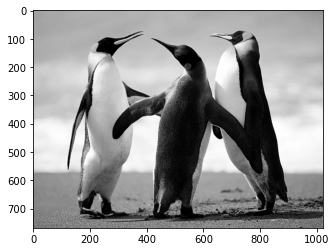

imagen binarizada


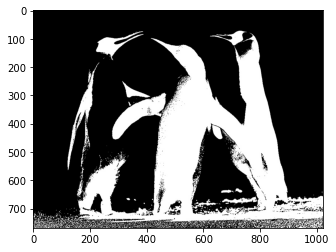

In [214]:
strImg = "paris.jpg"
img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.show()
print("imagen binarizada")
img2 = binarizacion(img, "Si")

---
---
---

# Problema 2 #
---
---
---

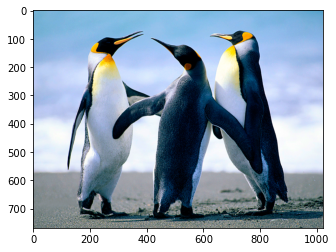

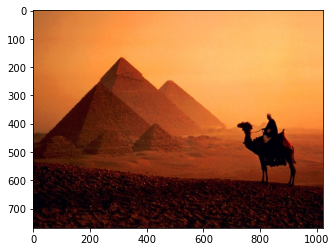

SUMA


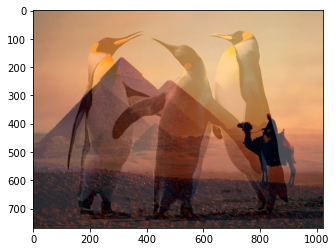

RESTA


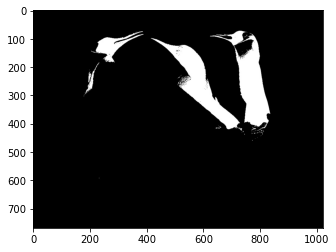

AND


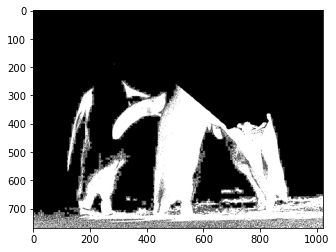

OR


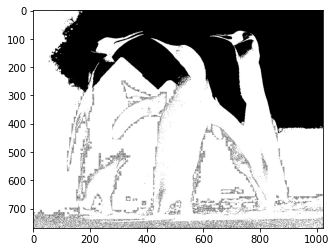

XOR


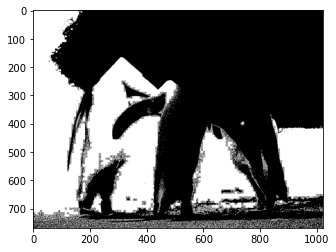

In [217]:
img1 = cv2.imread("paris.jpg")
img2 = cv2.imread("desierto.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) #RGB
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) #RGB
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()


print ("SUMA")
img3 = operar(img1, img2, "suma")
print ("RESTA")
img3 = operar(img1, img2, "resta")
print ("AND")
img3 = operar(img1, img2, "and")
print ("OR")
img3 = operar(img1, img2, "or")
print ("XOR")
img3 = operar(img1, img2, "xor")

---
---
---

# Problema 4 #
---
---
---

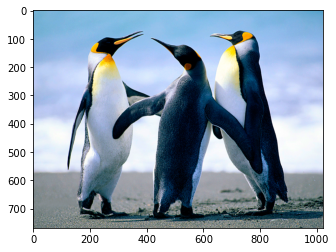

Negativa


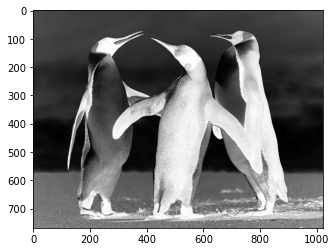

Lineal


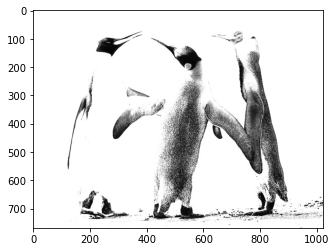

Lineal


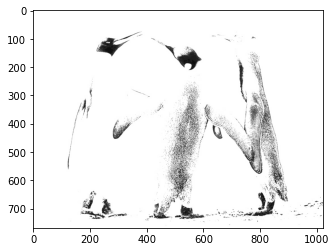

Logaritmica


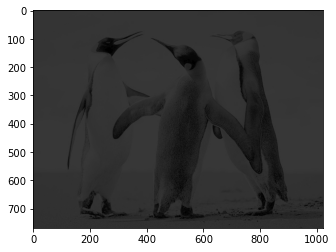

Exponencial


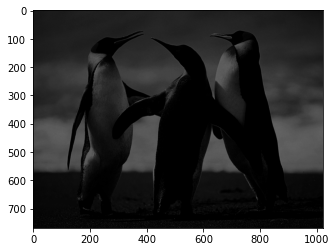

In [187]:
img1 = cv2.imread("paris.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) #RGB
plt.imshow(img1)
plt.show()

print("Negativa")
img2 = transformacion(img1, "negativa", "Si",0,0)
print("Lineal")
img2 = transformacion(img1, "lineal", "Si",5,5)
print("Lineal")
img2 = transformacion(img1, "lineal", "Si",15,15)
print("Logaritmica")
img2 = transformacion(img1, "logaritmica", "Si",10,0)
print("Exponencial")
img2 = transformacion(img1, "exponencial", "Si",100,4)


---
---
---

# Problema 5 #
---
---
---


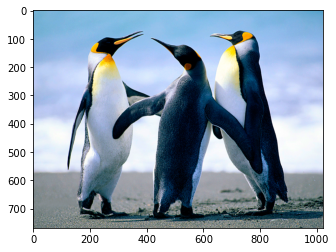

gaussiano


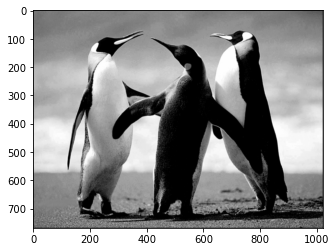

sobel


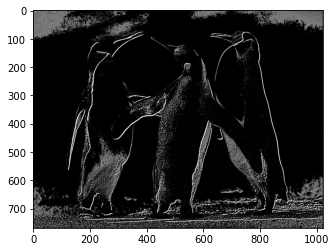

sharp


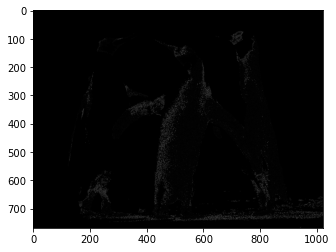

unsharp


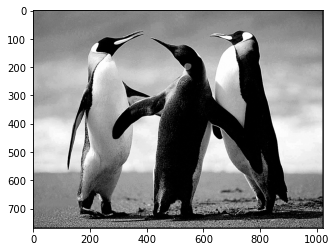

edge


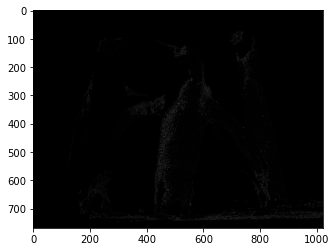

In [218]:
img1 = cv2.imread("paris.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) #RGB
plt.imshow(img1)
plt.show()

print("gaussiano")
img = convolutional_filter(img1, "gaussiano")
print("sobel")
img = convolutional_filter(img1, "sobel")
print("sharp")
img = convolutional_filter(img1, "sharp")
print("unsharp")
img = convolutional_filter(img1, "unsharp")
print("edge")
img = convolutional_filter(img1, "edge")



---
---
---

# Problema 6 #
___

## Kernel Laplaceano #
---
---
---


El filtro laplaciano es una derivada, pone a cero zonas con poca variación en la intensidad.  Se recomienda para el realce de rasgos lineales en entornos urbanos.

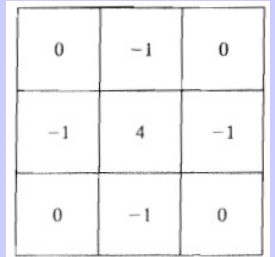


Es un filtro para realizar detalles finos.

• discretización de la derivada segunda

• debería ser un filtro isotrópico (rotacionalmente
invariante) para un cierto ángulo

• el operador isotrópico más simple es el operador
laplaciano


El filtro de Canny es un reconocido algoritmo de visión por computador para detección de bordes, lleva su nombre por su desarrollador John F. Canny